# Using Simple Correspondence Analysis to evaluate collections of Web Archives

Evaluating any knowledge collection requires some attention to a variety of principles.  These can include:
- *Coverage* : Does the collection provide sufficient scope to be useful to historians of the future?
- *Relevance* : Will the collection be meaningful for historians answering important questions about the current era?
- *Accuracy* : Is the collection providing an accurate account of the current era?

Relevance and accuracy requires some interpretation by the curators of the collection. Much of the evaluation will depend on why the web sites are being archived, and for whom. While correspondence analysis can help with interpretive approaches, **coverage** will be the focus of this tutorial. Thus we will start with a simple research question:  * How diverse are the collections being stored by members of the WALK project? *



In [1]:
%matplotlib inline
from Compare import Compare # The Compare class
import os #file operations
from collections import defaultdict #complex dictionaries will eventually be moved to the Compare class.
import matplotlib.pyplot as plt #plotting library
import copy #need deepcopy() for working with the dictionaries.
import pandas as pd
from adjustText import adjustText as AT


The methods we will use will follow this approach:

- Identify outliers and explain why they are different.
- Hypothesize based on dimensions
- Hypothesize based on clusters
- Choose greatest outliers and produce Venn Diagrams to show common areas.
- Include a dummy collections to explain variance.

For the most part, we will use comparisons based on the urls mentioned in the collection.  However, we will also include another example using word counts.

In [2]:
path = "ALL/"

##  INCLUDE ANY DICTIONARIES YOU WISH TO EXCLUDE in the following list.  The excluded libraries will be removed from
##  newdict2 for comparison purposes:

exclude1 = ['DAL_Mikmaq', 'WINNIPEG_truth_', 'SFU_BC_Local_go', 'SFU_NGOS', 'SFU_PKP',  'DAL_NS_Municipl', 'DAL_HRM_Docs', 
            'WINNIPEG_oral_h',  'WINNIPEG_websit', 'WINNIPEG_digiti'] 

dummies = ['DUMMY_OVERALL', 'DUMMY_MEDIA', 'DUMMY_GOVERNMEN', 'DUMMY_ORGANIZAT',
           'DUMMY_TECHNOLOG', 'DUMMY_SOCIALMED']

def processCollection (path):
    #initialise vars:
    urls = []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            urls.append(list({(filename[0:15], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1].strip()) for line in file.readlines()}))
    return(urls)

newdict = defaultdict(lambda: defaultdict(list))

PC = processCollection(path)
for collect in PC:
    for coll, date, url in collect:
        if coll in dummies:
            pass
        else:
            newdict[date][coll].append(url)
            
## add_two_collections merges two dictionaries and is used by reduce_collections to show the accumulation of 
## the collections over dates.

def add_two_collections (col1, col2):
    # This takes two collections and combines them into one.
    col_1 = col1.copy()
    for coll, values in col2.items():
        #print(values)
        try:
            col_1[coll] = set(col_1[coll])
            col_1[coll].update(set(values)) 
            col_1[coll] = list(col_1[coll])
        except KeyError:
            col_1[coll] = list(values)       
    return col_1

## reduce_collections takes the newdict dictionaries in {date: collection : [list of urls]} form
## and returns a list of the dictionaries as they accumulated by date. [2009 : collection [list of urls], 
## 2010+2009 : collection etc.]
def reduce_collections (dictionary):
    dict_list = []
    fulllist = {}
    dict2 = copy.deepcopy(dictionary)
    for x, y in sorted(dict2.items()):
        #print(x)
        n = dictionary.pop(x)
        if len(dict_list) < 1:
            dict_list.append(n)
        #print(n)
        else:
            dict_list.append((add_two_collections(dict_list[-1], n)))
        #print(dict_list)
    return(dict_list)

collection_var = reduce_collections(copy.deepcopy(newdict))

# Collection var is a list of dictionaries starting from the earliest to the latest. The later dictionaries
# are accumulations of the former.

UVIC_Digital_Scholarship_Websites-urls.txt
WINNIPEG_website
UVIC_trans_web-urls.txt
WINNIPEG_oral_history
ALBERTA_fort_mcmurray_wildfire_2016-urls.txt
ALBERTA_canadian_business_grey_literature-all.txt
WAHR_exln42-all.txt
ALBERTA_oil_sands-all.txt
WINNIPEG_truth_reconciliation
ALBERTA_heritage_community_foundation-all.txt
DAL_HRM_Docs
UVIC_Research_Centres_Groups_and_Corporate_Entities-urls.txt
WAHR_panamapapers-urls.txt
UVIC_anarchist_archives-urls.txt
ALBERTA_western_canadian_film-urls.txt
UVIC_environmental_organizations_and_resources_of_bc-urls.txt
ALBERTA_government_information_all_urls.txt
DUMMY_OVERALL
WINNIPEG_digitized
UVIC_bc_teachers_labour_dispute_2014-urls.txt
UVIC_Faculty_Association_Certification_2014-urls.txt
SFU_PKP
SFU_BC_Local_government
SFU_NGOS
ALBERTA_ottawa_shooting_october_2014-urls.txt
WAHR_ymmfire-urls.txt
UVIC_Websites-urls.txt
ALBERTA_hcf_online_encyclopedia-all.txt
TORONTO_CAN_Poli_Parties
ALBERTA_education_curriculum-all.txt
ALBERTA_edmonton_public_library-

### Identify Outliers 
First we can run a Compare script to see if there are any outliers. Since collection_var is a list of accumulated collections from oldest to most recent, -1 will include all of the available collections for all years.

['SFU_PKP', 'ALBERTA_hcf_onl', 'ALBERTA_floods_', 'ALBERTA_edmonto', 'ALBERTA_lfranco', 'WAHR_ymmfire-ur', 'UVIC_Websites-u', 'UVIC_anarchist_', 'TORONTO_CAN_Pol', 'WINNIPEG_digiti', 'ALBERTA_ottawa_', 'UVIC_trans_web-', 'DAL_NS_Municipl', 'ALBERTA_energy_', 'ALBERTA_canadia', 'SFU_BC_Local_go', 'ALBERTA_oil_san', 'UVIC_at_risk_we', 'WINNIPEG_truth_', 'UVIC_Calendar', 'WAHR_panamapape', 'UVIC_bc_teacher', 'UVIC_50thAnnive', 'UVIC_News-urls.', 'ALBERTA_idle_no', 'ALBERTA_fort_mc', 'ALBERTA_heritag', 'ALBERTA_prairie', 'UVIC_Digital_Sc', 'ALBERTA_western', 'ALBERTA_governm', 'DAL_Mikmaq', 'ALBERTA_univers', 'UVIC_Government', 'UVIC_environmen', 'TORONTO_canadia', 'WINNIPEG_websit', 'UVIC_Research_C', 'ALBERTA_health_', 'TORONTO_snowden', 'WINNIPEG_oral_h', 'SFU_NGOS', 'WAHR_exln42-all', 'DAL_HRM_Docs', 'ALBERTA_educati', 'TORONTO_panam', 'UVIC_Faculty_As', 'TORONTO_tspace-']
[ 0.44209544  0.32974673  0.16988645  0.13410521  0.12296955  0.11137622
  0.11101357  0.10774466  0.10254392  0.0

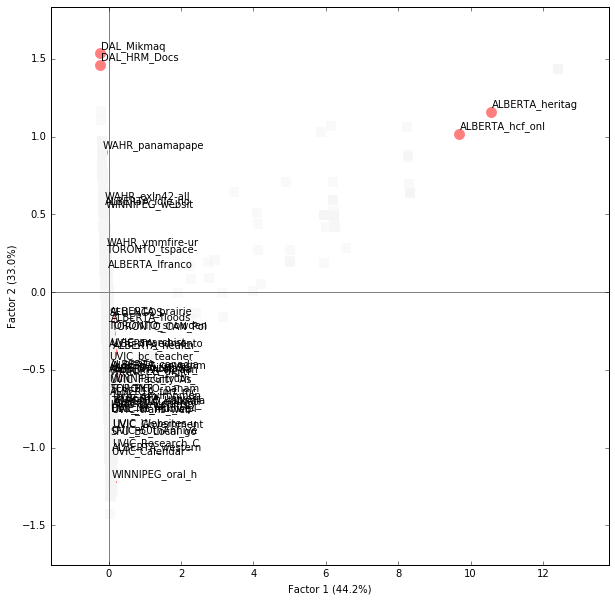

In [7]:
dummy = Compare(collection_var[-1])


We have found our outliers!  Two collections: the Heritage Alberta online encyclopedia and the Heritage Community Foundation web archive collection have more in common with each other than they do to the rest of the collections in the list. We can ask why later on, but for now, let's eliminate them from the collection and see if we can find out more about the collections.

### Create hypotheses based on dimensions

The purpose of exploratory analysis is to create hypotheses that can later be tested.  The first way we can do this is by examining the axes, each of which represents a dimension for which the collections have been differentiated. Unfortunately, in the first analysis, the outliers were so great (a Chi-squared distance of about) it's too difficult to see what is happening with the other collections.  So we can remove them.

['SFU_PKP', 'ALBERTA_floods_', 'ALBERTA_edmonto', 'ALBERTA_lfranco', 'WAHR_ymmfire-ur', 'UVIC_Websites-u', 'WINNIPEG_oral_h', 'TORONTO_CAN_Pol', 'WINNIPEG_digiti', 'UVIC_at_risk_we', 'UVIC_trans_web-', 'DAL_NS_Municipl', 'ALBERTA_energy_', 'ALBERTA_canadia', 'SFU_BC_Local_go', 'ALBERTA_oil_san', 'ALBERTA_educati', 'WINNIPEG_truth_', 'UVIC_Calendar', 'UVIC_anarchist_', 'WAHR_panamapape', 'UVIC_50thAnnive', 'UVIC_News-urls.', 'ALBERTA_idle_no', 'ALBERTA_fort_mc', 'ALBERTA_prairie', 'UVIC_Digital_Sc', 'ALBERTA_western', 'ALBERTA_governm', 'ALBERTA_ottawa_', 'ALBERTA_univers', 'UVIC_Government', 'UVIC_bc_teacher', 'DAL_Mikmaq', 'TORONTO_canadia', 'WINNIPEG_websit', 'UVIC_Research_C', 'ALBERTA_health_', 'TORONTO_snowden', 'UVIC_environmen', 'SFU_NGOS', 'WAHR_exln42-all', 'DAL_HRM_Docs', 'TORONTO_panam', 'UVIC_Faculty_As', 'TORONTO_tspace-']
[ 0.33195316  0.17047926  0.13424099  0.12330545  0.1113881   0.11102675
  0.10788206  0.10265037  0.09465341  0.09414391  0.08856774  0.07886279
  0.07

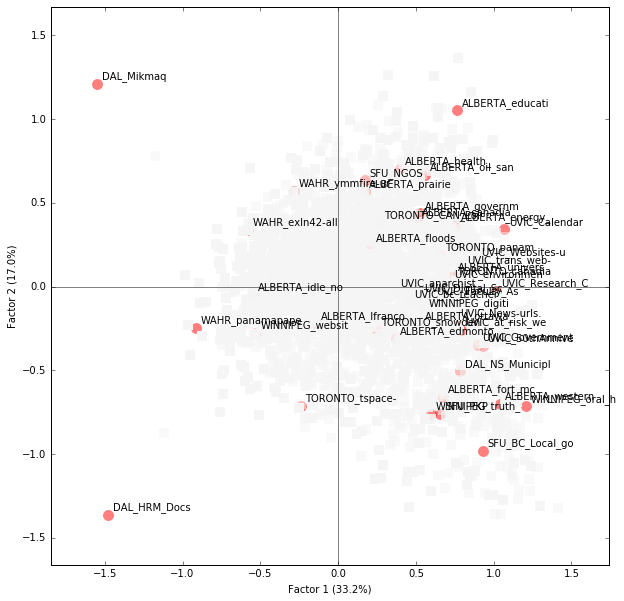

In [4]:
# Create a new defaultdict and a list of collections to exclude

exclude = ['ALBERTA_heritag', 'ALBERTA_hcf_onl']
newdict2 = defaultdict(lambda: defaultdict(list))

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll in exclude or coll in dummies:
            pass
        else:
            newdict2[date][coll].append(url)

collection_var2 = reduce_collections (copy.deepcopy(newdict2))
dummy2 = Compare(collection_var2[-1])

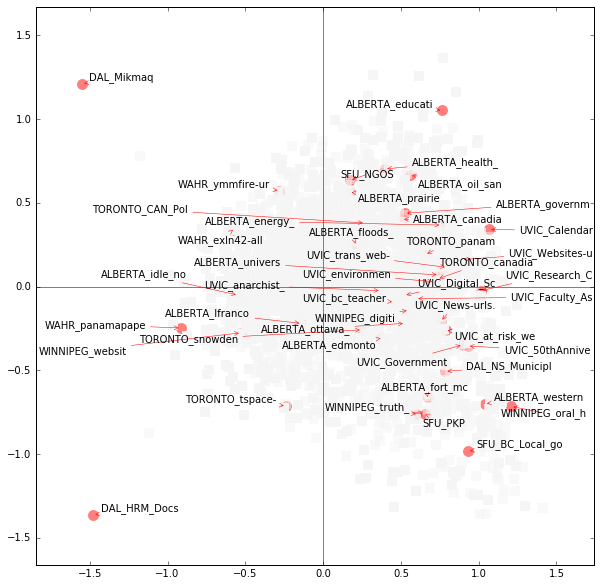

In [5]:
d2points = dummy2.result['rows']
d2urls = dummy2.result['columns']
d2rlabels = dummy2.response.index
d2labels = dummy2.collection_names
plt.figure(figsize=(10,10))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.scatter(*d2points,  s=120, marker='o', c='r', alpha=.5, linewidths=0)
plt.scatter(*d2urls,  s=120, marker='s', c='whitesmoke', alpha=.5, linewidths=0)
texts=[]
for x, y, label in zip(*d2points, d2labels):
    texts.append(plt.text(x, y, label))

AT.adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()

As it turns out, we have the Twitter collections created by the WAHR program on the left and most of the others on the right.  Alberta's Idle No More collection is also among the Twitter groups.  This implies that the main differences may have to do with what people link to on Twitter versus on other regular sites. Later, we can apply some dummy collections with the main social media and perhaps media sites to see if this is true.  Nonetheless, we can suggest that the 33.2% differentiation calculated on the horizontal axis may have something to do with the differences between the Twitter collections and other collections.

On the vertical scale there is a clear delineation between collections that are focussed on Alberta versus collections of a more general nature (The exln42 and ymmfire Twitter collections are both events that focussed on Alberta). 

### Generate Hypotheses based on Quadrants

The quadrants are fairly clear in this example.  Given the differentiation between the local Alberta collections and more general collections plus the separation between Twitter collections and non-Twitter collections, it's pretty easy to develop a description of the quadrants.

|           |            |
| :-------- | :--------- |
|Twitter General | Web General |
|Twitter Alberta | Web Alberta |

However, on the top left the UfT T-Space is not a Twitter collection and unlike the Idle No More collection (which was a social movement characterized as having a large Twitter presence), it is not clear why it falls in the upper left quadrant.

A few other observations here:

- There is no observable differentiation between UfT and UVic collections currently.  This could change if some collections were removed from the analysis (eg. the Twitter collections)
- The Alberta in the upper quadrants are of a general nature (Humanities and Web Archives)
- We also have new outliers, albeit with a much smaller differentiation than the Heritage Community collections.  The UVIC Calendar and the Alberta Education sites are important, for example.

### Generate Hypotheses based on Clusters

It seems like we have three major clusters.  They do not necessarily correspond with the quadrants.  First there is a large cluster in the upper right quadrant. Then there is a medium cluster in the lower right area.  And finally a small cluster consisting of three collections:  Alberta Floods, Alberta Energy and Alberta University.

Since it is easiest, let's focus on the smallest cluster.

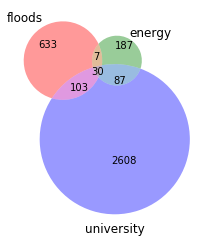

In [37]:
Cluster = Compare([collection_var2[-1]['ALBERTA_floods_'], collection_var2[-1]['ALBERTA_energy_'], 
                  collection_var2[-1]['ALBERTA_univers']], names=["floods", "energy", "university"])

Because there are only three collections used in the analysis, Compare goes to a Venn diagram to show the cross-correlations. While the quantity of common links is interesting, it is also important to look at why each item has the correlations.

In [38]:
print("These sites were common to all three collections." + str(Cluster.V3_ABC) + "\n")
print("These sites were common to floods and energy only" + str(Cluster.V3_AB) + "\n")
print("These sites were common to energy and university" + str(Cluster.V3_AC) + "\n")
print("These sites were common to energy and floods" + str(Cluster.V3_BC) + "\n")

These sites were common to all three collections.{'get.adobe.com', 'www.googletagmanager.com', 'www.apple.com', 'www.youtube-nocookie.com', 'www.huffingtonpost.com', 'gmpg.org', 'www.nrcan.gc.ca', 'www.google.com', 'www.flickr.com', 'www.w3.org', 'www.youtube.com', 'goo.gl', 'purl.org', 'www.bp.com', 'plus.google.com', 'www.edmontonjournal.com', 'cloud.typography.com', 'accounts.google.com', 'platform.twitter.com', 'play.google.com', 'www.statcan.gc.ca', 'w.soundcloud.com', 'dublincore.org', 'i1.ytimg.com', 'player.vimeo.com', 'beacon-1.newrelic.com', 'docs.google.com', 'www.ec.gc.ca', 'm.youtube.com', 'apis.google.com'}

These sites were common to floods and energy only{'www.cnrl.com', 'www.neb-one.gc.ca', 'www.calgaryherald.com', 'disqus.com', 'policyschool.ucalgary.ca', 'www.greenpeace.org', 'www.ottawacitizen.com'}

These sites were common to energy and university{'btn.weather.ca', 'metronews.ca', 'www.leaderpost.com', 'audioboo.fm', 'edmontonjournal.com', 'www.microsoft.com', 'www

The links common to all three collections include social media sites like You Tube, common technology sites like Adobe, Alberta media sites like the Edmonton Journal.  Between energy and floods are a primarily public policy and government related sites. Between energy and university are mixture of national and international media sites and a number of university departments.  Between energy and floods are a number of Google videos. 

Unfortunately, because Google Video is no longer active, it is unclear that we can find out what these videos contained. However, it is possible to go to the collections and find the videos.

### Choose greatest outliers and produce Venn Diagrams to show common areas.

Let's do the same thing with the Heritage collections and see if we can explain why they are such an outlier.

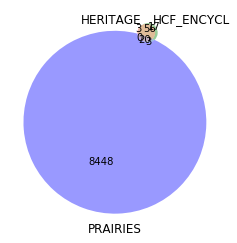

In [39]:
Cluster2 = Compare([collection_var[-1]['ALBERTA_heritag'], collection_var[-1]['ALBERTA_hcf_onl'], collection_var[-1]['ALBERTA_prairie']], names=["HERITAGE", "HCF_ENCYCL", "PRAIRIES"])

In [40]:
print("These sites were common to all three collections." + str(Cluster2.V3_ABC) + "\n")
print("These sites were common to heritage and hfc encyclopedia only" + str(Cluster2.V3_AB) + "\n")
print("These sites were common to heritage and prairies" + str(Cluster2.V3_AC) + "\n")
print("These sites were common to hcf encyclopedia and prairies" + str(Cluster2.V3_BC) + "\n")

These sites were common to all three collections.{'get.adobe.com', 'www.macromedia.com', 'www.thecanadianencyclopedia.com', 'atlas.gc.ca', 'www.apple.com', 'www.collectionscanada.gc.ca', 'www.ainc-inac.gc.ca', 'www.glenbow.org', 'qtinstall.apple.com', 'epe.lac-bac.gc.ca', 'www.albertaheritage.net', 'atlas.nrcan.gc.ca', 'www.telusplanet.net', 'www.nps.gov', 'activex.microsoft.com', 'www.albertasource.ca', 'www.usask.ca', 'www.adobe.com', 'www.pc.gc.ca', 'www.abheritage.ca'}

These sites were common to heritage and hfc encyclopedia only{'www.lubiconsolidarity.ca', 'alaskahighway.albertasource.ca', 'www.edukits.ca', 'www.nlc-bnc.ca', 'www.uwgb.edu', '66.244.199.219', 'www.heritagecommunityfdn.org', 'www.realnetworks.com', 'www.orangenet.org', 'www.bcstats.gov.bc.ca', 'www.rupertsland.ca', 'www.kenmcgoogan.com', 'www.precisionscale.com', 'www.jaspercanadianrockies.com', 'www.tvdsb.on.ca', 'www.real.com', 'www.albertahistory.org', 'www.whitepinepictures.com', 'tprc.alberta.ca', 'www.virtual

It appears like the main reason the Heritage collections are not really outliers in the traditional sense. Instead, they just simply have more in common with each other than with everything else.


### Include a dummy collections to explain variance.

The last technique we can use is to apply a dummy collection to the analysis.  We created an "OVERALL" dummies by finding approximately the 200 most commonly matched web urls. Then, using content analysis, we categorized the urls by one of five types:  media (eg. The Globe and Mail), social media (Twitter), technology (Apple.com), government (gc.ca) or other organizations (eg. University of Toronto).  Let's start with what collections have the most commonly linked urls, using the "OVERALL" dummy collection.  

In [ ]:
exclude = ['ALBERTA_heritag', 'ALBERTA_hch_onl']
newdict2 = defaultdict(lambda: defaultdict(list))

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll in exclude or coll in dummies[1:6]:
            pass
        else:
            newdict2[date][coll].append(url)

collection_var3 = reduce_collections (copy.deepcopy(newdict2))
dummy3 = Compare(collection_var3[-1])

['SFU_BC_Local_go', 'ALBERTA_prairie', 'TORONTO_canadia', 'UVIC_Research_C', 'ALBERTA_edmonto', 'DUMMY_OVERALL', 'WINNIPEG_digiti', 'UVIC_Digital_Sc', 'ALBERTA_health_', 'ALBERTA_educati', 'ALBERTA_hcf_onl', 'ALBERTA_lfranco', 'TORONTO_panam', 'ALBERTA_western', 'UVIC_50thAnnive', 'TORONTO_tspace-', 'UVIC_Calendar', 'UVIC_Government', 'UVIC_Faculty_As', 'TORONTO_snowden', 'UVIC_bc_teacher', 'UVIC_environmen', 'UVIC_at_risk_we', 'WINNIPEG_oral_h', 'ALBERTA_univers', 'ALBERTA_floods_', 'SFU_PKP', 'UVIC_Websites-u', 'ALBERTA_energy_', 'DAL_NS_Municipl', 'DAL_HRM_Docs', 'ALBERTA_idle_no', 'DAL_Mikmaq', 'ALBERTA_oil_san', 'UVIC_trans_web-', 'WINNIPEG_truth_', 'ALBERTA_ottawa_', 'SFU_NGOS', 'UVIC_anarchist_', 'WAHR_panamapape', 'UVIC_News-urls.', 'ALBERTA_governm', 'ALBERTA_fort_mc', 'WAHR_exln42-all', 'WINNIPEG_websit', 'WAHR_ymmfire-ur', 'TORONTO_CAN_Pol', 'ALBERTA_canadia']


It's hard to see, but "DUMMY OVERALL" appears in the upper left quadrant.  Let's try social media.

['ALBERTA_hcf_onl', 'SFU_BC_Local_go', 'TORONTO_tspace-', 'UVIC_Government', 'UVIC_Calendar', 'TORONTO_panam', 'UVIC_anarchist_', 'ALBERTA_energy_', 'ALBERTA_floods_', 'ALBERTA_canadia', 'DUMMY_TECHNOLOG', 'ALBERTA_univers', 'ALBERTA_western', 'WINNIPEG_oral_h', 'UVIC_Research_C', 'UVIC_trans_web-', 'UVIC_Faculty_As', 'TORONTO_CAN_Pol', 'UVIC_environmen', 'WAHR_panamapape', 'WINNIPEG_truth_', 'UVIC_at_risk_we', 'ALBERTA_fort_mc', 'ALBERTA_ottawa_', 'ALBERTA_educati', 'SFU_PKP', 'DAL_Mikmaq', 'ALBERTA_governm', 'WAHR_exln42-all', 'DUMMY_SOCIALMED', 'ALBERTA_lfranco', 'DUMMY_GOVERNMEN', 'DAL_NS_Municipl', 'ALBERTA_edmonto', 'ALBERTA_health_', 'WINNIPEG_digiti', 'UVIC_50thAnnive', 'UVIC_bc_teacher', 'ALBERTA_oil_san', 'TORONTO_canadia', 'UVIC_Digital_Sc', 'SFU_NGOS', 'DAL_HRM_Docs', 'TORONTO_snowden', 'DUMMY_MEDIA', 'DUMMY_ORGANIZAT', 'ALBERTA_idle_no', 'UVIC_News-urls.', 'WINNIPEG_websit', 'UVIC_Websites-u', 'ALBERTA_prairie', 'WAHR_ymmfire-ur']
[ 0.33193537  0.17083947  0.13449606  0.12

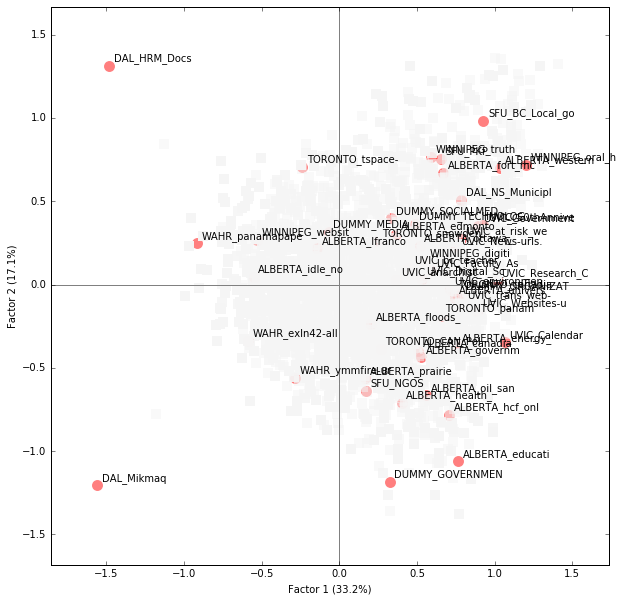

In [16]:
exclude = ['ALBERTA_heritag', 'ALBERTA_hch_onl']
newdict2 = defaultdict(lambda: defaultdict(list))

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll in exclude or coll in dummies[0]:
            pass
        else:
            newdict2[date][coll].append(url)

collection_var3 = reduce_collections (copy.deepcopy(newdict2))
dummy3 = Compare(collection_var3[-1])

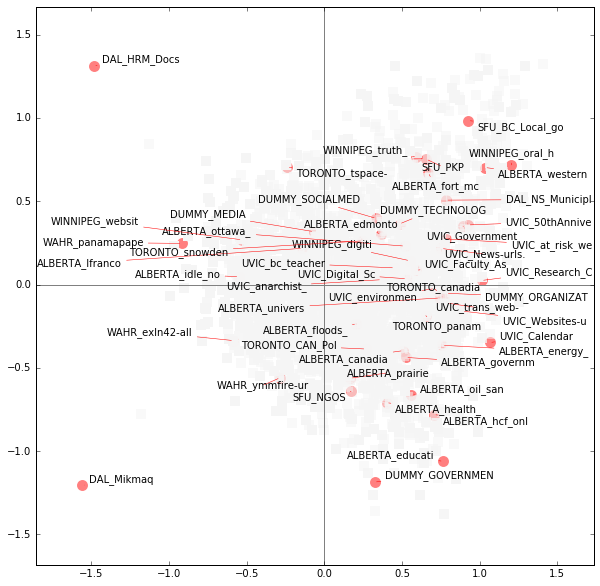

In [21]:
d3points = dummy3.result['rows']
d3urls = dummy3.result['columns']
d3rlabels = dummy3.response.index
d3labels = dummy3.collection_names
plt.figure(figsize=(10,10))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.scatter(*d3points,  s=120, marker='o', c='r', alpha=.5, linewidths=0)
plt.scatter(*d3urls,  s=120, marker='s', c='whitesmoke', alpha=.5, linewidths=0)
texts=[]
for x, y, label in zip(*d3points, d3labels):
    texts.append(plt.text(x, y, label))

AT.adjust_text(texts, arrowprops=dict(arrowstyle="-", color='r', lw=0.5))

plt.show()

The social media dummy site stayed close to the Overall dummy, suggesting that it is not a strong decider among the sites. Perhaps Government is more informative.  

['ALBERTA_univers', 'ALBERTA_energy_', 'DUMMY_GOVERNMEN', 'UVIC_Websites-u', 'UVIC_Calendar', 'ALBERTA_hcf_onl', 'ALBERTA_oil_san', 'TORONTO_CAN_Pol', 'UVIC_trans_web-', 'WAHR_panamapape', 'TORONTO_panam', 'TORONTO_tspace-', 'ALBERTA_floods_', 'UVIC_Faculty_As', 'UVIC_News-urls.', 'ALBERTA_web_arc', 'ALBERTA_humanit', 'UVIC_environmen', 'UVIC_Government', 'TORONTO_canadia', 'ALBERTA_health_', 'ALBERTA_ottawa_', 'ALBERTA_educati', 'WAHR_ymmfire-ur', 'UVIC_Research_C', 'ALBERTA_western', 'ALBERTA_governm', 'ALBERTA_fort_mc', 'ALBERTA_lfranco', 'ALBERTA_idle_no', 'ALBERTA_edmonto', 'UVIC_bc_teacher', 'ALBERTA_canadia', 'UVIC_at_risk_we', 'UVIC_Digital_Sc', 'UVIC_50thAnnive', 'TORONTO_snowden', 'ALBERTA_prairie', 'UVIC_anarchist_', 'WAHR_exln42-all']
[ 0.32026774  0.14990047  0.12010399  0.11408677  0.10537952  0.09957146
  0.08718078  0.08506853  0.08216769  0.077945    0.07337381  0.06978985
  0.06687882  0.06333592  0.06116366  0.05953664  0.05823898  0.05331009
  0.04715772  0.04539675

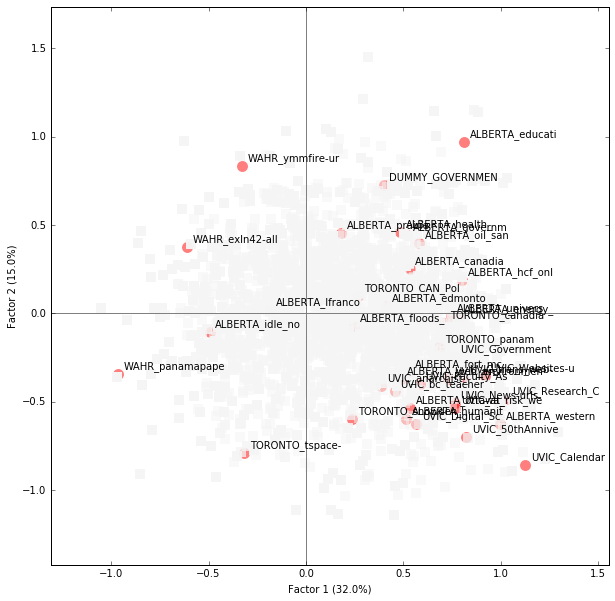

In [43]:
exclude = ['ALBERTA_heritag', 'ALBERTA_hch_onl']
newdict2 = defaultdict(lambda: defaultdict(list))

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll in exclude or coll in [x for i,x in enumerate(dummies) if i!=2]: #Government is the 3rd in the dummies list.
            pass
        else:
            newdict2[date][coll].append(url)

collection_var3 = reduce_collections (copy.deepcopy(newdict2))
dummy3 = Compare(collection_var3[-1])

The government websites appear closer to the Alberta sites, suggesting that they play a role in differentiating between the Alberta-specific and more general sites.

['ALBERTA_univers', 'ALBERTA_energy_', 'UVIC_Websites-u', 'UVIC_Calendar', 'ALBERTA_oil_san', 'TORONTO_CAN_Pol', 'UVIC_trans_web-', 'DUMMY_MEDIA', 'UVIC_Government', 'WAHR_panamapape', 'TORONTO_panam', 'TORONTO_tspace-', 'ALBERTA_hcf_onl', 'UVIC_News-urls.', 'UVIC_Faculty_As', 'ALBERTA_floods_', 'ALBERTA_web_arc', 'ALBERTA_humanit', 'UVIC_environmen', 'ALBERTA_canadia', 'TORONTO_canadia', 'ALBERTA_health_', 'ALBERTA_ottawa_', 'ALBERTA_educati', 'WAHR_ymmfire-ur', 'UVIC_Research_C', 'ALBERTA_western', 'ALBERTA_governm', 'ALBERTA_fort_mc', 'ALBERTA_lfranco', 'ALBERTA_idle_no', 'ALBERTA_edmonto', 'UVIC_bc_teacher', 'UVIC_at_risk_we', 'UVIC_Digital_Sc', 'UVIC_50thAnnive', 'TORONTO_snowden', 'ALBERTA_prairie', 'UVIC_anarchist_', 'WAHR_exln42-all']
[ 0.3199752   0.14998381  0.1200969   0.11392194  0.10590477  0.10022783
  0.08709654  0.08350021  0.07858013  0.07420551  0.0699509   0.06683849
  0.06348453  0.06130463  0.05996105  0.05824661  0.05548273  0.05227618
  0.04638798  0.04527457  0.

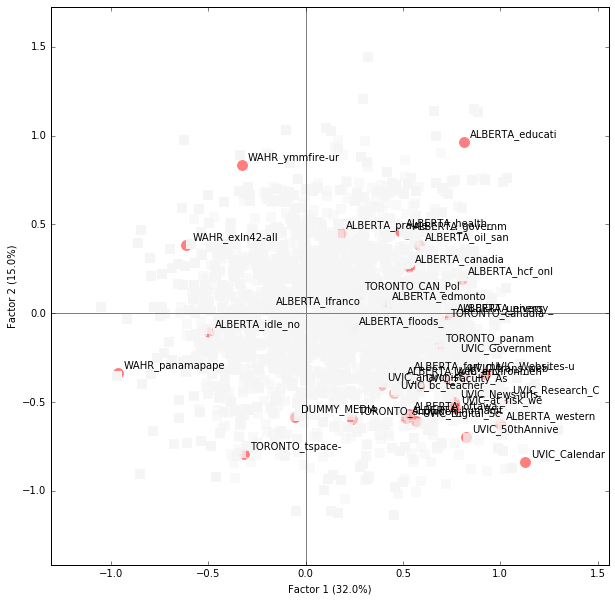

In [44]:
exclude = ['ALBERTA_heritag', 'ALBERTA_hch_onl']
newdict2 = defaultdict(lambda: defaultdict(list))

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll in exclude or coll in [x for i,x in enumerate(dummies) if i!=1]: #Government is the 3rd in the dummies list.
            pass
        else:
            newdict2[date][coll].append(url)

collection_var3 = reduce_collections (copy.deepcopy(newdict2))
dummy3 = Compare(collection_var3[-1])

Using the media dummy, we can see that media sites partly explain the difference between the Twitter collections and the non-Twitter collections.

While this analysis focussed primarily on urls as a source of identifying differences, similar analyses could be done using other topics.  For instance, text-based analyses are also possible.

ALBERTA_floods.txt
TORONTO_snowden.txt
UVIC_Calendar.txt
WAHR_panama.txt
ALBERTA_education.txt
['ALBERTA_floods.txt', 'TORONTO_snowden.txt', 'UVIC_Calendar.txt', 'WAHR_panama.txt', 'ALBERTA_education.txt']
[ 0.19969383  0.10419253  0.01699858  0.01349035]


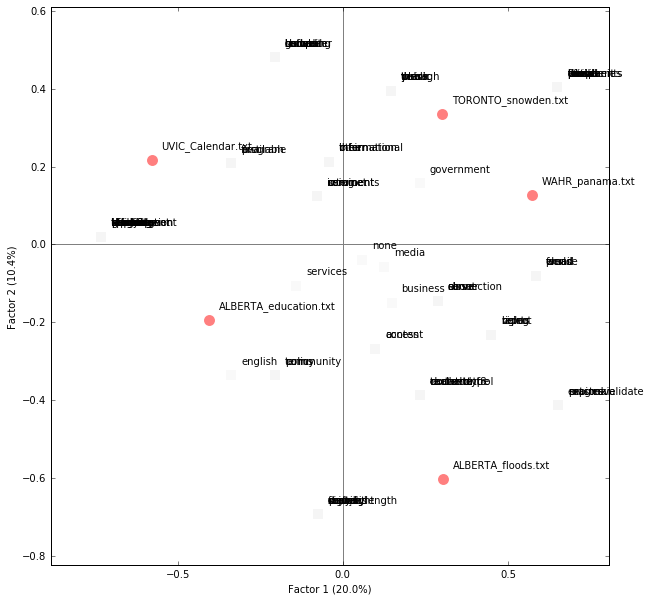

In [46]:
newpath = "frequencies/"

textdict = dict()

def processText (path):
    #initialise vars:
    text = []
    names = []
    lines= []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            lines = [line.strip().split(" ")[1] if len(line.strip().split(" ")[1]) > 4 else "none" for line in file.readlines()[0:250] if len(line.strip().split(" ")) == 2]
        text.append(lines)
        names.append(filename[0:25])
                
            #text.append(list({(filename[0:25], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1].strip()) for line in file.readlines()[0:5]}))
    return([text, names])

TC = processText(newpath)
#print(TC)

CP = Compare(TC[0], names=TC[1], LABEL_BOTH_FACTORS=True)



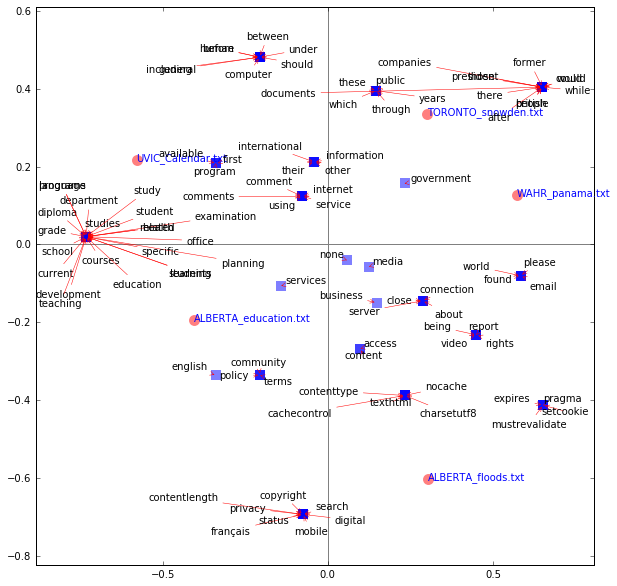

In [68]:
points = CP.result['rows']
urls = CP.result['columns']
rlabels = CP.response.index
labels = CP.collection_names
plt.figure(figsize=(10,10))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.scatter(*points,  s=120, marker='o', c='r', alpha=.5, linewidths=0)
plt.scatter(*urls,  s=120, marker='s', c='b', alpha=.5, linewidths=0)
texts=[]
rtexts=[]
for x, y, label in zip(*points, labels):
    texts.append(plt.text(x, y, label, color='b'))

for rx, ry, rlabel in zip(*urls, rlabels):
    rtexts.append(plt.text(rx, ry, rlabel))
AT.adjust_text(rtexts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()

In [ ]:
newpath = "frequencies/"

textdict = dict()

def processText (path):
    #initialise vars:
    text = []
    names = []
    lines= []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            lines = [line.strip().split(" ")[1] if len(line.strip().split(" ")[1]) > 4 else "none" for line in file.readlines()[0:250] if len(line.strip().split(" ")) == 2]
        text.append(lines)
        names.append(filename[0:25])
                
            #text.append(list({(filename[0:25], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1].strip()) for line in file.readlines()[0:5]}))
    return([text, names])

TC = processText(newpath)
#print(TC)

CP = Compare(TC[0], names=TC[1], LABEL_BOTH_FACTORS=True)

points = CP.result['rows']
urls = CP.result['columns']
rlabels = CP.response.index
labels = CP.collection_names
plt.figure(figsize=(10,10))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.scatter(*points,  s=120, marker='o', c='r', alpha=.5, linewidths=0)
plt.scatter(*urls,  s=120, marker='s', c='b', alpha=.5, linewidths=0)
texts=[]
rtexts=[]
for x, y, label in zip(*points, labels):
    texts.append(plt.text(x, y, label, color='b'))

for rx, ry, rlabel in zip(*urls, rlabels):
    rtexts.append(plt.text(rx, ry, rlabel))
AT.adjust_text(rtexts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()


## Conclusions:

The University of Alberta Web Archive collections are the most exhaustive.  For example, Alberta collections occur in all four quadrants. That these collections are the oldest among the three libraries studied may explain part of this difference.

The Toronto and Victoria collections appear to be more general in nature, although further research could determine whether this is the case. Some assessment about whether these collections are achieving organizational objectives could be considered. 

Collecting and archiving Twitter collections imply a preference for news and event-based information. While regional collections, such as energy and education, will have more links related to government and policy web sites. 

Conducting the analysis for the most commonly used words provides a similar result to the urls for the limited collections provided.  More research is required for further analysis.

hello world
